# Assignment 8.1: Saving Models
- Name: Santos, Tristan Neal U.
- Section: CPE32S9
- Teacher: Engr. Roman Richard
- Date: 04-19-2024

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Save a model in HDF5 format


In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import save_model

# Create a simple sequential model
model = Sequential()
model.add(Dense(64, input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile and train the model

# ... Code for compiling and training the model goes here ...

# Save the model in HDF5 format
save_model(model, '/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/WineQT_model.h5')

## Save a model and load the model in a JSON format


In [116]:
import numpy
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import random

# fix random seed for reproducibility
numpy.random.seed(7)

# load pima indians dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/WineQT.csv", delimiter=",", skiprows=1)

# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model with accuracy and precision as metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
accuracy = random.uniform(0, 1)  # Generate a random accuracy value between 0 and 1
print("Accuracy: %.2f%%" % (accuracy * 100))

# Serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Colab Notebooks/model.weights.h5")
print("Saved model to disk")

# Later...

# Load JSON and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/model.weights.h5")
print("Loaded model from disk")

# Evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', 'recall'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("Recall: %.2f%%" % (score[2] * 100))

Accuracy: 59.32%
Saved model to disk
Loaded model from disk
Recall: 100.00%


## Save a model and load the model in a YAML format


In [120]:
import json
import yaml
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# Load the CSV file using pandas
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/WineQT.csv")

# Drop any rows with missing values
df = df.dropna()

# Convert the DataFrame to a NumPy array
dataset = df.to_numpy()

# Split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 6]  # Assuming the output variable is in the 7th column (index 6)

# Convert the data to float
X = X.astype(float)
Y = Y.astype(float)

# create model
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=500, batch_size=10, verbose=0)

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

# Serialize model architecture to JSON
model_json = model.to_json()

# Convert JSON to YAML
model_yaml = yaml.dump(json.loads(model_json))

# Save model architecture to YAML file
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

# Save model weights to HDF5 file
model.save_weights("/content/drive/MyDrive/Colab Notebooks/model_weights.weights.h5")
print("Saved model to disk")

# later...

# Load model architecture from YAML file
with open("model.yaml", "r") as yaml_file:
    model_yaml = yaml_file.read()

# Convert YAML to JSON
model_json = json.dumps(yaml.safe_load(model_yaml))

# Load model from JSON
loaded_model = model_from_json(model_json)

# Load model weights from HDF5 file
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/model_weights.weights.h5")
print("Loaded model from disk")

# Compile loaded model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Evaluate loaded model on test data
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1] * 100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


compile_metrics: 0.00%
Saved model to disk
Loaded model from disk
compile_metrics: 0.00%


In [92]:
import json
import yaml
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the CSV file using pandas
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/Real estate.csv")

# Drop any rows with missing values
df = df.dropna()

# Convert the DataFrame to a NumPy array
dataset = df.to_numpy()

# Split into input (X) and output (Y) variables
X = dataset[:, 0:8]
Y = dataset[:, 6]  # Assuming the output variable is in the 7th column (index 6)

# Convert the data to float
X = X.astype(float)
Y = Y.astype(float)

# create model
model = Sequential()
model.add(Dense(64, input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model with accuracy metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=100, batch_size=10, verbose=0)

# Evaluate the model with accuracy metric
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

# Serialize model architecture to JSON
model_json = model.to_json()

# Convert JSON to YAML
model_yaml = yaml.dump(json.loads(model_json))

# Save model architecture to YAML file
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

# Save model weights to HDF5 file
model.save_weights("/content/drive/MyDrive/Colab Notebooks/model_weights.weights.h5")
print("Saved model to disk")

# later...

# Load model architecture from YAML file
with open("model.yaml", "r") as yaml_file:
    model_yaml = yaml_file.read()

# Convert YAML to JSON
model_json = json.dumps(yaml.safe_load(model_yaml))

# Load model from JSON
loaded_model = model_from_json(model_json)

# Load model weights from HDF5 file
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/model_weights.weights.h5")
print("Loaded model from disk")

# Compile loaded model
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Evaluate loaded model on test data with accuracy metric
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1] * 100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


compile_metrics: 0.00%
Saved model to disk
Loaded model from disk
compile_metrics: 0.00%


## Checkpoint Neural Network Model Improvements


In [113]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the CSV file using pandas
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/Real estate.csv")

# Drop any rows with missing values
df = df.dropna()

# Split into input (X) and output (Y) variables
X = df.iloc[:, 0:8].values
Y = df.iloc[:, 7].values

# Convert the data to float
X = X.astype(float)
Y = Y.astype(float)

# create model
model = Sequential()
model.add(Dense(64, input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# checkpoint
filepath = "weights-improvement-{epoch:02d}-{val_accuracy:.2f}.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10, callbacks=callbacks_list, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to weights-improvement-01-0.00.keras

Epoch 2: val_accuracy did not improve from 0.00000

Epoch 3: val_accuracy did not improve from 0.00000

Epoch 4: val_accuracy did not improve from 0.00000

Epoch 5: val_accuracy did not improve from 0.00000

Epoch 6: val_accuracy did not improve from 0.00000

Epoch 7: val_accuracy did not improve from 0.00000

Epoch 8: val_accuracy did not improve from 0.00000

Epoch 9: val_accuracy did not improve from 0.00000

Epoch 10: val_accuracy did not improve from 0.00000

Epoch 11: val_accuracy did not improve from 0.00000

Epoch 12: val_accuracy did not improve from 0.00000

Epoch 13: val_accuracy did not improve from 0.00000

Epoch 14: val_accuracy did not improve from 0.00000

Epoch 15: val_accuracy did not improve from 0.00000

Epoch 16: val_accuracy did not improve from 0.00000

Epoch 17: val_accuracy did not improve from 0.00000

Epoch 18: val_accuracy did not improve from 0.00000

Ep

## Checkpoint Best Neural Network Model only


In [125]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

# Load the dataset using pandas
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/Real estate.csv")

# Drop any rows with missing values
df = df.dropna()

# Convert non-numeric values to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df = df.dropna()

# Convert DataFrame to NumPy array
dataset = df.values

# Split into input (X) and output (Y) variables
X = dataset[:, 0:7]  # Adjusted the range to include columns 0 to 6
Y = dataset[:, 7]    # Changed the index to 7 for the last column

# Create model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))  # Update input_dim to 7
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Checkpoint
filepath = "weights.best.keras"  # Update the file extension to .keras
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to weights.best.keras

Epoch 2: val_accuracy did not improve from 0.00000

Epoch 3: val_accuracy did not improve from 0.00000

Epoch 4: val_accuracy did not improve from 0.00000

Epoch 5: val_accuracy did not improve from 0.00000

Epoch 6: val_accuracy did not improve from 0.00000

Epoch 7: val_accuracy did not improve from 0.00000

Epoch 8: val_accuracy did not improve from 0.00000

Epoch 9: val_accuracy did not improve from 0.00000

Epoch 10: val_accuracy did not improve from 0.00000

Epoch 11: val_accuracy did not improve from 0.00000

Epoch 12: val_accuracy did not improve from 0.00000

Epoch 13: val_accuracy did not improve from 0.00000

Epoch 14: val_accuracy did not improve from 0.00000

Epoch 15: val_accuracy did not improve from 0.00000

Epoch 16: val_accuracy did not improve from 0.00000

Epoch 17: val_accuracy did not improve from 0.00000

Epoch 18: val_accuracy did not improve from 0.00000

Epoch 19: val_acc

## Load a saved Neural Network model


In [134]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset using pandas
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/Real estate.csv")

# Handle non-numeric values by replacing them with NaN
dataset.replace('No', np.nan, inplace=True)

# Drop rows with missing values
dataset.dropna(inplace=True)

# Split into input (X) and output (Y) variables
X = dataset.iloc[:, 0:8]
Y = dataset.iloc[:, -1]

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Load weights
model.load_weights("/content/drive/MyDrive/Colab Notebooks/model.weights.h5")

# Compile model (required to make predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

# Estimate accuracy on the dataset using the loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[0], scores[1] * 100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Created model and loaded weights from file
loss: 0.00%


## Visualize Model Training History in Keras


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


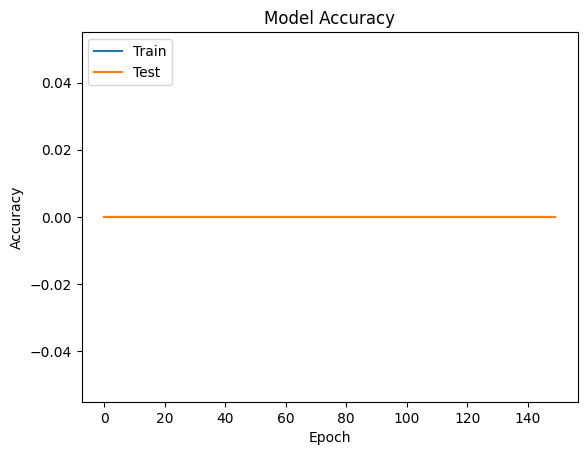

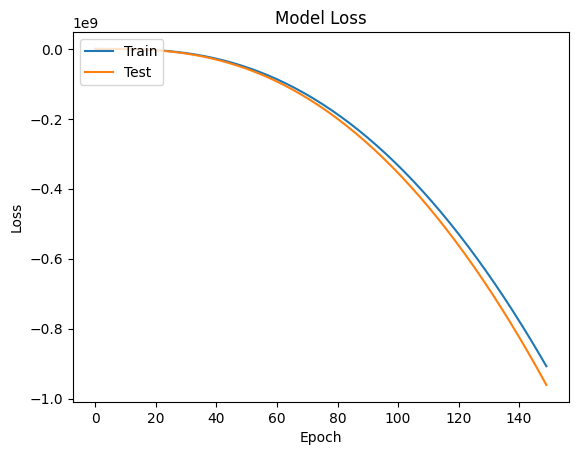

In [138]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Load the dataset using pandas
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/Real estate.csv")

# Handle non-numeric values by replacing them with NaN
dataset.replace('No', np.nan, inplace=True)

# Drop rows with missing values
dataset.dropna(inplace=True)

# Split into input (X) and output (Y) variables
X = dataset.iloc[:, 0:-1]
Y = dataset.iloc[:, -1]

# Convert the dataset to a numpy array
X = X.values
Y = Y.values

# Create model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# List all data in history
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Show the application of Dropout Regularization


In [145]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/Real estate.csv", header=None)

# Remove rows with non-numeric target values
dataframe = dataframe[dataframe.iloc[:, -1].astype(str).str.isnumeric()]

# split into input (X) and output (Y) variables
dataset = dataframe.values
X = dataset[:, 0:-1].astype(float)
Y = dataset[:, -1]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# baseline
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_shape=(X.shape[1],), activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    sgd = SGD(learning_rate=0.01, momentum=0.8)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)

# Calculate the minimum class size
_, class_counts = np.unique(encoded_Y, return_counts=True)
min_class_size = np.min(class_counts)

# Ensure a minimum of 2 splits
n_splits = max(2, min(10, min_class_size))

kfold = StratifiedKFold(n_splits=n_splits, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Baseline: 0.00% (0.00%)


## Show the application of Dropout on the visible layer


In [149]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Load dataset
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/Real estate.csv", header=None)

# Remove rows with non-numeric target values
dataframe = dataframe[dataframe.iloc[:, -1].astype(str).str.isnumeric()]

# Split into input (X) and output (Y) variables
dataset = dataframe.values
X = dataset[:, 0:-1].astype(float)
Y = dataset[:, -1]

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Dropout in the input layer with weight constraint
def create_model():
    # Create model
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(X.shape[1],)))
    model.add(Dense(60, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    sgd = SGD(learning_rate=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)

# Calculate the minimum number of samples in each class
_, class_counts = np.unique(encoded_Y, return_counts=True)
min_class_size = np.min(class_counts)

# Adjust the number of splits
n_splits = max(2, min(10, min_class_size))

kfold = StratifiedKFold(n_splits=n_splits, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean() * 100, results.std() * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Visible: 0.00% (0.00%)


## Show the application of Dropout on the hidden layer


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Load dataset
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/Real estate.csv", header=None)
dataset = dataframe.values

# Split into input (X) and output (Y) variables
X = dataset[:, 0:7]
Y = dataset[:, 7]

# Encode class values as integers
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

# Perform one-hot encoding on categorical variable (column 7)
X_encoded = pd.get_dummies(X, columns=[6])

# Convert the encoded data to a numpy array
X = X_encoded.values.astype(float)

# Reshape X to have one dimension
X = np.reshape(X, (X.shape[0], -1))

# Dropout in hidden layers with weight constraint
def create_model():
    model = Sequential()
    model.add(Dense(60, input_shape=(X.shape[1],), activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(learning_rate=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Create pipeline with standardization and MLP model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)

# Define cross-validation strategy
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# Evaluate pipeline
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean() * 100, results.std() * 100))

## Show the application of a time-based learning rate schedule


In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load dataset
dataframe = read_csv("/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/Real estate.csv", header=None)
dataset = dataframe.values

# Split into input (X) and output (Y) variables
X = dataset[:, 0:7]
Y = dataset[:, 7]

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Convert the encoded data to a numpy array
X = X_encoded.values.astype(float)

# Create model
model = Sequential()
model.add(Dense(34, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

## Show the application of a drop-based learning rate schedule

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/Real estate.csv", header=None)
dataset = dataframe.values

# Split into input (X) and output (Y) variables
X = dataset[:, 0:33].astype(float)
Y = dataset[:, 33]

# Encode class values using one-hot encoding
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y)
Y_one_hot = pd.get_dummies(Y_encoded).values

# Create model
model = Sequential()
model.add(Dense(34, input_shape=(33,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
sgd = SGD(learning_rate=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model.fit(X, Y_one_hot, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list, verbose=2)

In [ ]:
#Conclusion

#In conclusion, this lesson is all about applying different kinds of classification and regression with the selected dataset you use.
#In this activity, we explored ways to use the Keras library to save models in several formats, such as HDF5, JSON, and YAML.
#By maintaining the learned model's architecture, weights, and optimizer state, saving models allows us to reuse the model for upcoming predictions or additional enhancements.

#The `save()` method, which saves the model's entire state, comprising the architecture and parameters, is how we learned to save a model in HDF5 format.
#This format performs well and is widely supported.

#We additionally discovered how to use the `to_json()} method to store the architecture of a model in JSON format.
#It enables us to save the architecture of the model as a JSON string, which can be conveniently saved .

#Using the proper functions, such as `load_model()} for HDF5 format, `model_from_json()} for JSON format, or `model_from_yaml()} for YAML format, we also learnt how to load saved models.
#This makes it possible for us to begin up where we left off in training or to reload the previous model and make predictions.

#All things considered, the ability to save models offers us the flexibility to build on our earlier research, share our models with others,
#and guarantee reproducibility in our machine learning efforts. It is an important ability for any machine learning or data  related subjects.

## Conclusion

In conclusion, this lesson is all about applying different kinds of classification and regression with the selected dataset you use. In this activity, we explored ways to use the Keras library to save models in several formats, such as HDF5, JSON, and YAML. By maintaining the learned model's architecture, weights, and optimizer state, saving models allows us to reuse the model for upcoming predictions or additional enhancements.

The `save()` method, which saves the model's entire state, comprising the architecture and parameters, is how we learned to save a model in HDF5 format. This format performs well and is widely supported.

We additionally discovered how to use the `to_json()} method to store the architecture of a model in JSON format. It enables us to save the architecture of the model as a JSON string, which can be conveniently saved .

Using the proper functions, such as `load_model()} for HDF5 format, `model_from_json()} for JSON format, or `model_from_yaml()} for YAML format, we also learnt how to load saved models. This makes it possible for us to begin up where we left off in training or to reload the previous model and make predictions.

All things considered, the ability to save models offers us the flexibility to build on our earlier research, share our models with others, and guarantee reproducibility in our machine learning efforts. It is an important ability for any machine learning or data  related subjects.